## Machine Learning Model for Predicting School Admissions from an Indian Perspective



### About this dataset

#### Context 
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

#### Content  
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )  
TOEFL Scores ( out of 120 )  
University Rating ( out of 5 )  
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
Undergraduate GPA ( out of 10 )  
Research Experience ( either 0 or 1 )  
Chance of Admit ( ranging from 0 to 1 )  

#### Acknowledgements  
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

#### Inspiration  
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

#### Citation  
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Read dataset and display columns

In [2]:
admit_data = pd.read_csv("Admission_Predict.csv")
admit_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Examine basic statistics of the data

In [3]:
admit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


### Looking at the table above we see that we have 400 entries and no missing data

In [4]:
cols = admit_data.columns.tolist()
print(cols)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


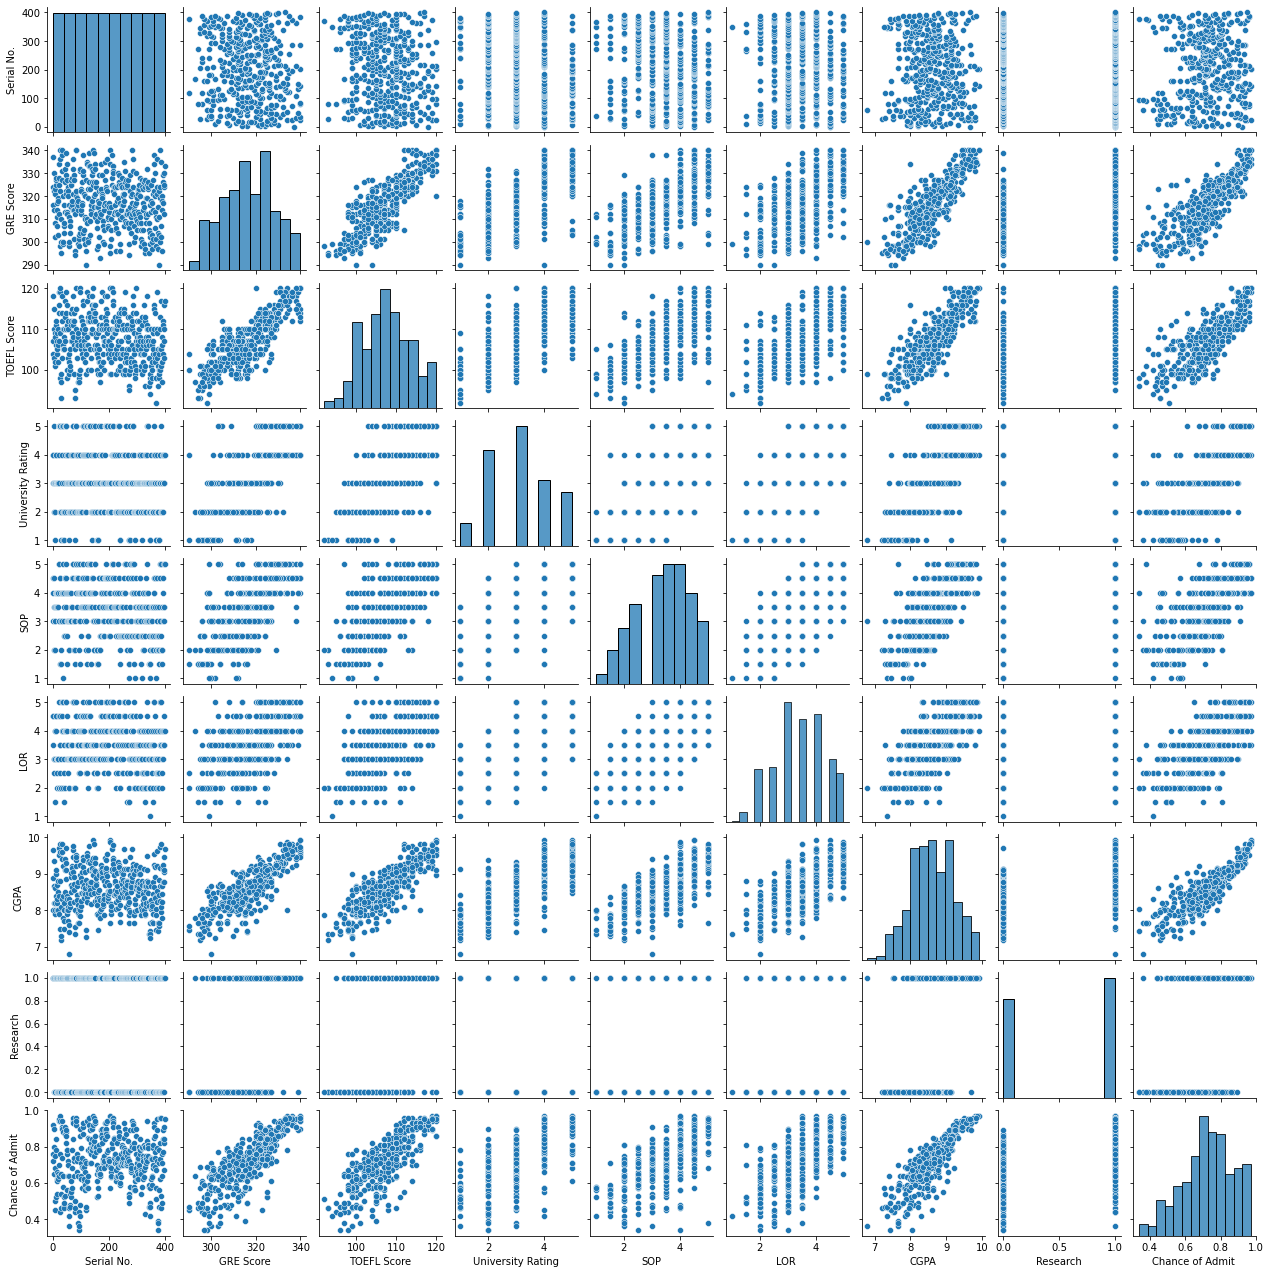

In [5]:
sns.pairplot(admit_data[cols], height=2.0)

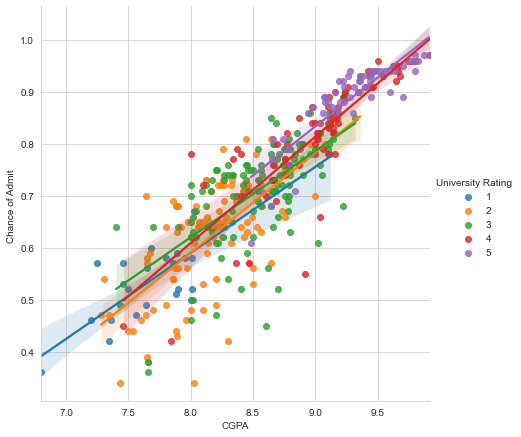

In [6]:
sns.set_style('whitegrid')
sns.lmplot(x='CGPA', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


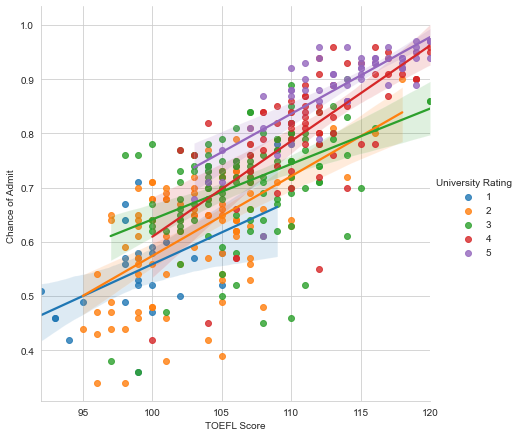

In [7]:

sns.lmplot(x='TOEFL Score', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


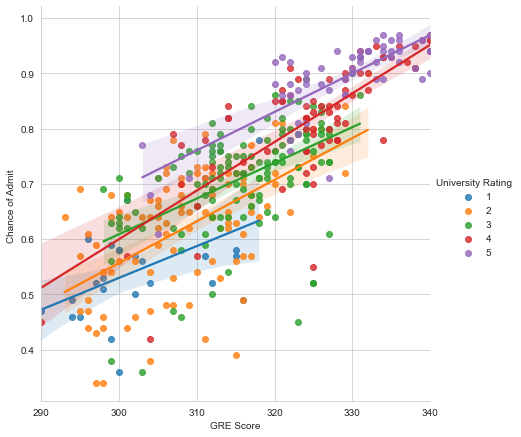

In [8]:

sns.lmplot(x='GRE Score', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


# Observations for examination of statistics  

Looking at the Chance of Admission row we see a strong corelation between test scores, statement of purpose, and letter of recomendation, but less of a corelation with research experience.  

The histogram at the end of the row shows the typical chance of admission to be about 70% with more weight toward the higher chance of admission.  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with either standadization or normalization before our regression model is built.

#### Probablility Distribution of Admissions

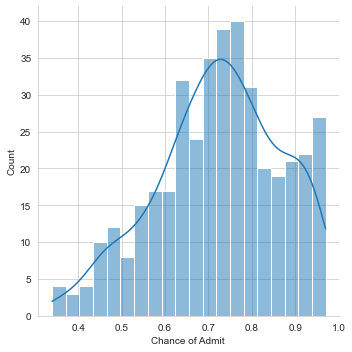

In [9]:
sns.displot(admit_data['Chance of Admit '], bins=20, kde=True)
plt.show()

#### Distribution  of School Ratings

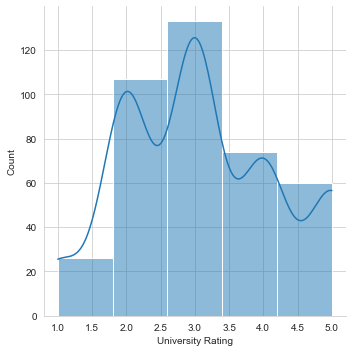

In [10]:
sns.displot(admit_data['University Rating'], bins=5, kde=True)
plt.show()

# Pandas Profiling Report for Data

In [11]:
profile = ProfileReport(admit_data, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_file('Admission Predictions Profile Report.html')

# Variable Selection for Predictive Modeling

## Calculation of covariance matrix

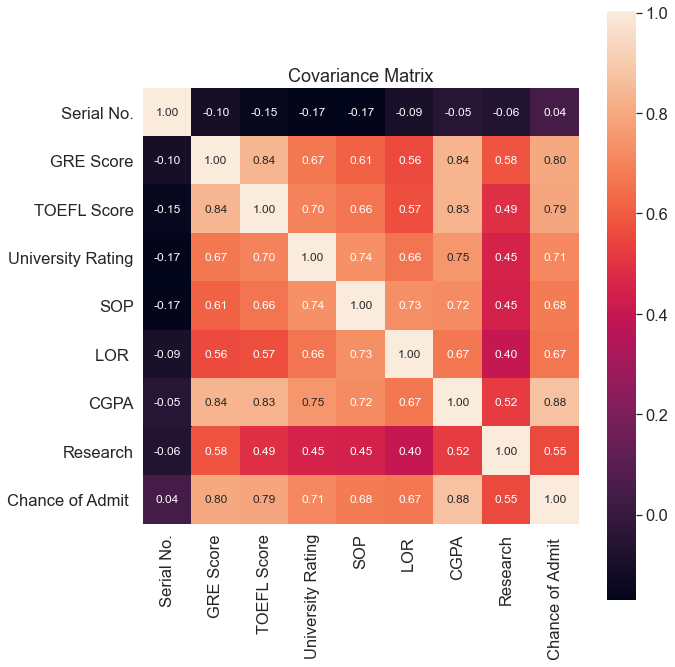

In [12]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(admit_data[cols].iloc[:,range(0,9)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### Selecting Important Variables  

From the covariance matrix above we the the Admit variable correlats the strongest with the variables: CGPA, GRE Score and TOEFL Score, and less with the variables: University Rating, SOP and LOR.

In [13]:
cols_selected = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']
admit_data[cols_selected].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [14]:
admit_data_X = admit_data[cols_selected].iloc[:,0:8].values     # Features Matrix
admit_data_y = admit_data[cols_selected]['Chance of Admit ']    # Target Variable

In [15]:
admit_data_X.shape

(400, 7)

In [16]:
admit_data_y.shape

(400,)

### Scaling the Data  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with standadization. This will center to the mean and scale to unit variance.

In [17]:
cols_scaled = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'] # Column names for scaled data

admit_X_scale = scale(admit_data_X)  # Scale the data

admit_X_scaled = pd.DataFrame(admit_X_scale, columns=cols_scaled) # Convert to dataframe

admit_X_scaled.head().round(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.76,1.75,0.80,1.09,1.17,1.76,1.37
1,0.63,-0.07,0.80,0.60,1.17,0.46,0.25
2,-0.07,-0.56,-0.08,-0.40,0.05,-1.01,-0.03
3,0.45,0.43,-0.08,0.10,-1.06,0.12,0.53
4,-0.24,-0.73,-0.95,-1.39,-0.50,-0.65,-0.52


#### Testing order of columns

#### Verify the scaling  

We can test to see that the scaling centered to the mean.

In [18]:
admit_X_scaled.mean().round(2)

GRE Score           -0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                 -0.0
CGPA                 0.0
Research            -0.0
dtype: float64

#### Check for Standard Deviation  

We'll perform a similar check using panda's std() method.

In [19]:
admit_X_scaled.std(ddof=0)

GRE Score            1.0
TOEFL Score          1.0
University Rating    1.0
SOP                  1.0
LOR                  1.0
CGPA                 1.0
Research             1.0
dtype: float64

#### Calculate the PCA Transformation  

Fit the PCA transfromation using the scaled data.

In [20]:
admit_pca = PCA().fit(admit_X_scaled)

Plot the cumulative variance ratio with number of components.

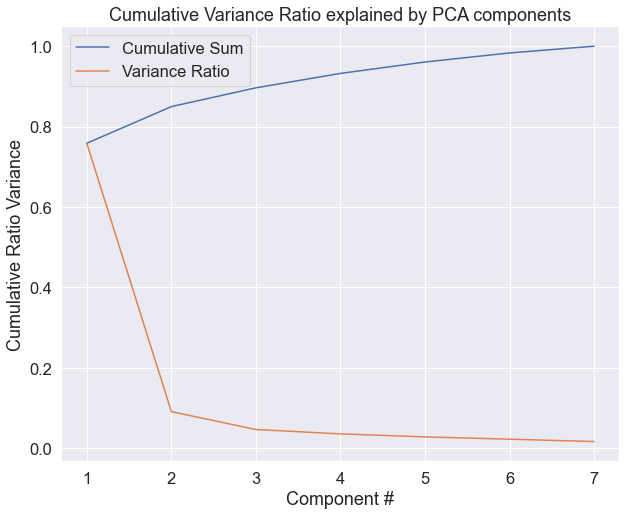

In [21]:
plt.subplots(figsize=(10,8))
plt.plot(admit_pca.explained_variance_ratio_.cumsum())
plt.plot(admit_pca.explained_variance_ratio_)
plt.xlabel('Component #')
plt.xticks([0, 1, 2, 3, 4, 5, 6,],['1', '2', '3', '4', '5', '6', '7'])
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio explained by PCA components')
plt.legend(['Cumulative Sum', 'Variance Ratio'])

Looking at the plot above we can see that the first two Principle Components  account for about 85% of our variance in the Cumulative Sum. We can also see that there is a distinct 'elbow' the plot of variance ratio between component 2 and 3, telling us that components 3 thru 7 are much less important than components 1 and 2. 

#### Calculate the variance of the first two components

In [22]:
pc_var = 100 * admit_pca.explained_variance_ratio_.cumsum()[1]
print(pc_var.round(2))

84.97


In [23]:
admit_pca_x = admit_pca.transform(admit_X_scaled)
admit_pca_x


array([[-3.69389349e+00, -6.02363739e-01, -4.07678128e-01, ...,
         1.96725709e-01, -7.66917862e-03, -2.36430757e-01],
       [-1.40909074e+00,  7.63327637e-01, -1.45365730e-01, ...,
         2.56507099e-01, -5.08791896e-01, -9.91484976e-02],
       [ 8.17882168e-01,  2.53948573e-01, -1.18181993e-01, ...,
         1.94259693e-01, -2.81954804e-01,  7.17112948e-01],
       ...,
       [-3.35159505e+00,  8.58704118e-02, -1.95772780e-01, ...,
        -1.19962542e-01,  1.29796440e-01, -5.91503276e-02],
       [ 2.49994176e-01,  8.55790847e-01, -3.35315477e-01, ...,
        -1.26463787e-01, -2.20325718e-01, -5.76330566e-01],
       [-3.57758137e+00, -5.34814365e-01,  9.71698542e-05, ...,
        -4.62719858e-01,  7.62259804e-02, -1.35098156e-01]])

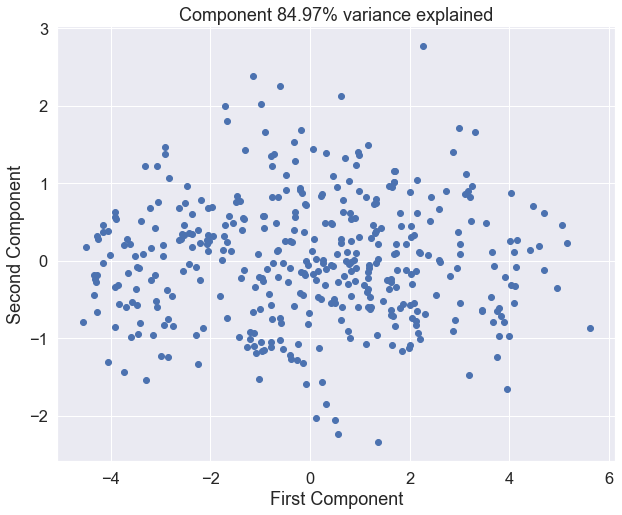

In [24]:
x = admit_pca_x[:, 0]
y = admit_pca_x[:, 1]

plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title(f'Component {pc_var:.2f}% variance explained');


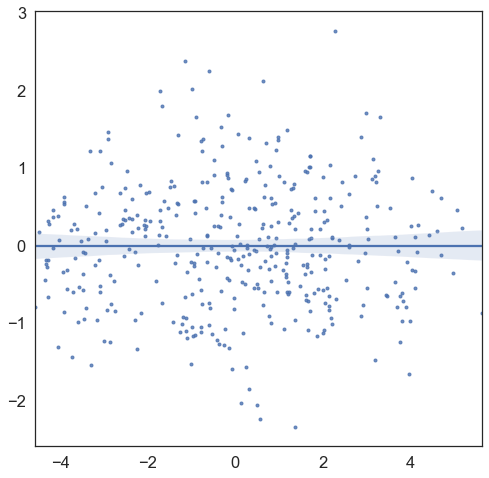

In [25]:
x = admit_pca_x[:, 0]
y = admit_pca_x[:, 1]


sns.set_style('white')
plt.figure(figsize=(8,8))
sns.regplot(x=x,y=y, marker='.');

# Linear Regression Ordinary Least Squares

In [26]:
# Check data shapes
admit_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [27]:
# Choose X and Y data sets
X = admit_data.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = admit_data[['Chance of Admit ']]

# Check Shapes
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [28]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [29]:
# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [30]:
# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(268, 7) (132, 7)
(268, 1) (132, 1)


In [31]:
import statsmodels.api as sm

# Create the model
rModel = sm.OLS(y_train, X_train)

# Fit the model
rModel_fit = rModel.fit()

# Evaluate the model
rModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              5213.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):                   2.39e-276
Time:                        16:14:32   Log-Likelihood:                          362.24
No. Observations:                 268   AIC:                                     -710.5
Df Residuals:                     261   BIC:                                     -685.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0029      0.000     -6.226      0.000      -0.004      -0.002
TOEFL Score           0.0035      0.001      2.535      0.012       0.001       0.006
University Rating     0.0249      0.006      4.400      0.000       0.014       0.036
SOP                  -0.0122      0.007     -1.747      0.082      -0.026       0.002
LOR                   0.0271      0.007      3.979      0.000       0.014       0.040
CGPA                  0.1301      0.015      8.442      0.000       0.100       0.160
Research              0.0609      0.009      6.990      0.000       0.044       0.078
==============================================================================
Omnibus:                       44.231   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.430
Skew:                          -0.892   Prob(JB):                     5.65e-18
Kurtosis:                       4.983   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel_fit.predict(X_test)

# Combine the predictions and actual values into a data frame
pred_act = pd.DataFrame(y_test)
pred_act['predicted admit'] = y_pred
pred_act.head()

,Chance of Admit,predicted admit
98,0.90,0.867062
133,0.79,0.785191
31,0.74,0.676914
323,0.62,0.620379
41,0.49,0.656040


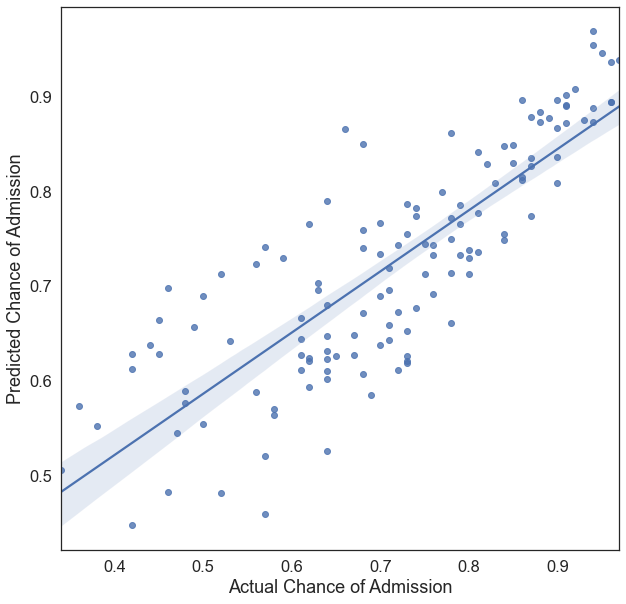

In [33]:
plt.figure(figsize=(10,10))
sns.regplot(x='Chance of Admit ', y='predicted admit', data=pred_act)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission');

### Check the Root Mean Squared Error

he RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 

In [34]:
# Define a function to check the RMSE.
import math
from sklearn.metrics import mean_squared_error, r2_score 

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

rmse(pred_act['Chance of Admit '], pred_act['predicted admit'])

0.08641558545322667

## Using less data

In [35]:
admit_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [36]:
# Choose X and Y data sets
X = admit_data[['GRE Score', 'TOEFL Score', 'CGPA']]
y = admit_data[['Chance of Admit ']]

# Check Shapes
X.head()

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [37]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [38]:
# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(268, 3) (132, 3)
(268, 1) (132, 1)


In [39]:
import statsmodels.api as sm

# Create the model
rModel = sm.OLS(y_train, X_train)

# Fit the model
rModel_fit = rModel.fit()

# Evaluate the model
rModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6627.
Date:                Sun, 29 Nov 2020   Prob (F-statistic):                   7.73e-249
Time:                        16:14:33   Log-Likelihood:                          282.43
No. Observations:                 268   AIC:                                     -558.9
Df Residuals:                     265   BIC:                                     -548.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GRE Score      -0.0051      0.001     -9.730      0.000      -0.006      -0.004
TOEFL Score     0.0060      0.002      3.520      0.001       0.003       0.009
CGPA            0.1972      0.016     12.411      0.000       0.166       0.228
==============================================================================
Omnibus:                       28.479   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.238
Skew:                          -0.824   Prob(JB):                     3.67e-08
Kurtosis:                       3.592   Cond. No.                     1.03e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Let's use our new model to make predictions of the dependent variable y.
y_pred = rModel_fit.predict(X_test)

# Combine the predictions and actual values into a data frame
pred_act = pd.DataFrame(y_test)
pred_act['predicted admit'] = y_pred
pred_act.head()

,Chance of Admit,predicted admit
11,0.84,0.774900
28,0.46,0.475274
123,0.61,0.699749
83,0.92,0.895123
147,0.83,0.819549


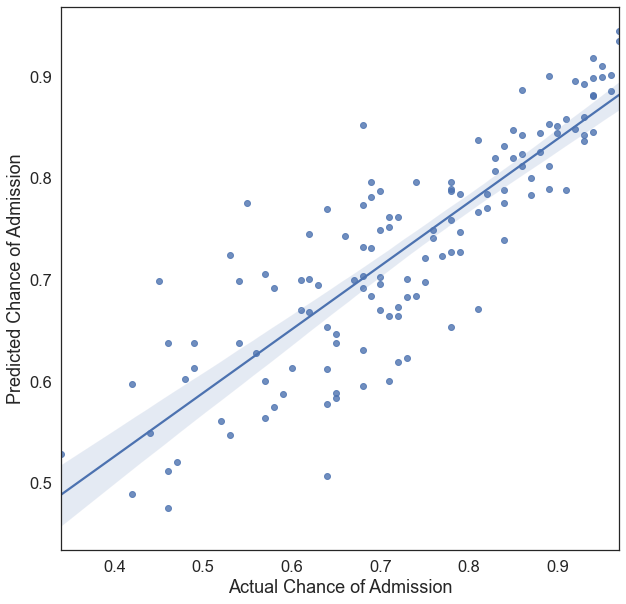

In [41]:
plt.figure(figsize=(10,10))
sns.regplot(x='Chance of Admit ', y='predicted admit', data=pred_act)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission');

### Check the Root Mean Squared Error
The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions.



In [42]:
rmse(pred_act['Chance of Admit '], pred_act['predicted admit'])

0.07939590343663926

### Using less data is less accurate
R Squared difference 0.99 vs. 0.98
RMSE difference 0.06 vs. 0.08

In [43]:
X_test

,GRE Score,TOEFL Score,CGPA
11,327,111,9.00
28,295,93,7.20
123,308,108,8.22
83,322,115,9.36
147,326,114,9.11
...,...,...,...
148,339,116,9.80
205,295,99,7.65
252,318,100,8.54
73,314,108,9.04


In [44]:
admit_data.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
185,186,327,113,4,4.5,4.5,9.11,1,0.89
182,183,299,100,2,3.0,3.5,7.88,0,0.68
162,163,318,109,3,3.0,3.0,8.50,0,0.67
378,379,303,98,1,2.0,2.5,7.65,0,0.56
167,168,313,102,3,2.0,3.0,8.27,0,0.64
386,387,302,101,2,2.5,3.5,7.96,0,0.46
255,256,307,110,4,4.0,4.5,8.37,0,0.79
129,130,333,118,5,5.0,5.0,9.35,1,0.92
233,234,304,100,2,2.5,3.5,8.07,0,0.64
292,293,302,99,2,1.0,2.0,7.97,0,0.56


In [45]:
chance = rModel_fit.predict([327, 113, 9.11])

In [46]:
print(chance)

[0.80850921]
